# Fourier transform

It's integeral transform that takes a function as input then ouputs another function that describes which frequenties are present in the original function

## Definition

Allow you to transform any periodic function into a sum of sines and cosines. 

## Jean Baptiste Joseph Fourier (1768–1830)

$F(u)$ holds the *amplitude* and *phase* of the sinusoid of frequency $u$.

$$
\begin{align}
F(u) &= \int_{-\infty}^{\infty} f(x)\, e^{-i2\pi u x}\, dx, \\
F(u) &= \Re\{F(u)\} + i\,\Im\{F(u)\}.
\end{align}
$$

The **amplitude** is

$$
A(u) = \sqrt{ \Re\{F(u)\}^2 + \Im\{F(u)\}^2 }.
$$

and the **phase** is

$$
\phi(u) = \tan^{-1}\!\left(\frac{\Im\{F(u)\}}{\Re\{F(u)\}}\right).
$$



---

## Discrete Fourier Transform (DFT)

Recall the continuous Fourier transform in time:

$$
X(F) = \int_{-\infty}^{\infty} x(t)\, e^{-i2\pi F t}\, dt.
$$

The **discrete version** is

$$
X_k = \sum_{n=0}^{N-1} x_n\, e^{-i2\pi \frac{k n}{N}},
$$

where

$$
\frac{k}{N} \approx F, \qquad n \approx t.
$$

Here:
- $N$ is the total number of samples.
- $k$ is the frequency index, ranging from $0$ to $N-1$.
- $X_k$ is generally **complex**, representing both amplitude and phase of frequency component $k$.

Expanding the sum using Euler’s formula $e^{-i\theta} = \cos(\theta) - i\sin(\theta)$:

$$
\begin{align}
X_k &= \sum_{n=0}^{N-1} x_n \left[\cos\!\left(2\pi\frac{k n}{N}\right) - i \sin\!\left(2\pi\frac{k n}{N}\right)\right] \\
&= A_k + i B_k,
\end{align}
$$

where $A_k$ and $B_k$ correspond to the real and imaginary parts, respectively.

At the end, you obtain a **complex number** $X_k$, which can be plotted on the complex plane.  
The **magnitude** $|X_k|$ gives the amplitude, and the **angle** $\arg(X_k)$ gives the phase.

---

### Computing $X_k$ in Practice

Imagine you have a simple $\sin(x)$ function from $0$ to $2\pi$. You then sample, for example, **5 points** — that is, $N=5$.

Assume you want to compute $X_1$ (so $k=1$). You know $N$, and you have all values of $x_n = \sin(x_n)$ for $n=0,1,2,3,4$. You plug them into

$$
X_k = \sum_{n=0}^{N-1} x_n\, e^{-i2\pi \frac{k n}{N}}.
$$

At the end, you’ll get a **complex number** representing that frequency component.

You would then repeat the process for $k=2,3,4,$ and so on.

---

### How many $k$ Values?

If you have $N$ samples, then you can compute $N$ discrete frequency components:

$$
k = 0, 1, 2, \dots, N-1.
$$

However:
- Because the DFT of real-valued signals is **symmetric**, you typically only need to examine up to $k = N/2$ (the “positive frequencies”).
- The other half ($k > N/2$) contains the complex-conjugate mirror of those components.

So, for $N = 5$, you can compute $k = 0, 1, 2, 3, 4$, but often interpret only the first $\lfloor N/2 \rfloor$ as unique frequency components.

## How would you do this in 2D?

Let $f(x,y)$ be a continuous function of spatial coordinates $x, y$. Its 2D Fourier transform is

$$
F(u,v) = \iint_{-\infty}^{\infty} f(x,y)\,e^{-i\,2\pi\,(u x + v y)}\,dx\,dy,
$$

where $u, v$ are the spatial frequencies (cycles per unit length) along $x$ and $y$.

The inverse transform is

$$
f(x,y) = \iint_{-\infty}^{\infty} F(u,v)\,e^{+i\,2\pi\,(u x + v y)}\,du\,dv.
$$


### Discrete 2D DFT (samples on an $M\times N$ grid)

Assume you have **discrete** samples $f[x,y]$ for

$$
x=0,1,\dots,M-1,\qquad y=0,1,\dots,N-1,
$$

and you want their 2D DFT $F[u,v]$ defined at the **discrete frequency indices**

$$
u=0,1,\dots,M-1,\qquad v=0,1,\dots,N-1.
$$

**DFT:**

$$
F[u,v] = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}
f[x,y]\;e^{-i\,2\pi\left(\frac{u x}{M}+\frac{v y}{N}\right)}.
$$

**Inverse DFT (IDFT):**

$$
f[x,y] = \frac{1}{MN}\sum_{u=0}^{M-1}\sum_{v=0}^{N-1}
F[u,v]\;e^{+i\,2\pi\left(\frac{u x}{M}+\frac{v y}{N}\right)}.
$$

## Example with numpy

Here is an example of 2D Fourier transform where frequencies/pixels are shown as dots below:

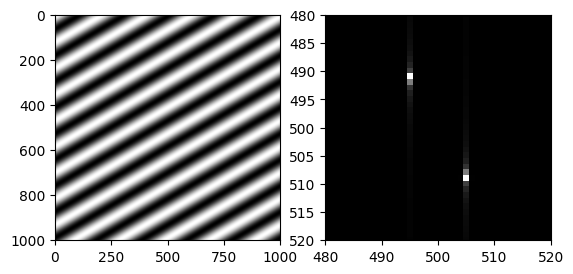

In [ ]:
# Source: https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100
angle = np.pi/3
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
# Shift the zero-frequency component to the center
ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

<!-- 

Imagine you have a circle. A ball rolls along the circle. The circle would have travelled by the distance of $2\pi R$ to reach the original position. Here $R$ is the radius of the circle. Due to its periodic nature, it can be written using Fourier series:

$$
\psi(x) = \sum_n A_n \cos \left(\frac{nx}{R}\right) + B_n \sin \left(\frac{nx}{R}\right)
$$


We first assume that the wave is a periodic function with the period of $2\pi R$:

$$
\psi(x) = \psi(x + 2\pi R)
$$

We can further simplify the equation using Euler's identify of $e^{i\theta} = \cos(\theta) + i \sin(\theta)$ so it becomes

As a result, the Fourier series finally becomes Fourier series more convieniently as

$$ \psi(x) = \sum_{n=-{\infty}}^\infty \psi_n e^{inx/R}.$$

where $\theta = \frac{nx}{R}$.

Let us then further simplify the expression in the exponential by defining $k\equiv \frac{n}{R}$

$$ \psi(x) = \sum_{n=-{\infty}}^\infty \psi_n e^{ikx}.$$

here $k$ is the wavenumber. If you try to make sense out of $e^{ikx}$ you can try to further use Euler's identify of

$e^{ikx} = \cos(kx) + i \sin(kx)$
 a
As you increase the value of $k$, you would imagine there will be a greater number of oscilations of the wave. Hence, often time, the greater $k$, the greater "momentum" transfer would occur.

The term "momentum" makes sense physical.

Imagine you are standing near the beach. The wave comes at you. Now, if the wave has a lot of oscilations, you body will be tumblled downs up and down more rapidly and there is a change in velocity of your body. This is momentum change where it is defined as $p=mv$!

Of course, this is a bit abstract for now. The $e^{inx/R}$ is the basis and $\psi_n$ is the coefifcient. 

Now, how would you do Fouier transformation for $\psi(x)$?

There is a mathematicl trick to this. Please each side by $e^{-imx/R}$:

$$
e^{-imx/R}\psi(x) = \sum_{-\infty}^\infty \psi_n e^{inx/R} e^{-imx/R}
$$ 

and integrate both sides from $-\pi R$ to $\pi R$, the circumference of the circle:

$$
\int_{-\pi R}^{\pi R}dx e^{-imx/R}\psi(x) = \sum_{-\infty}^\infty \psi_n \int_{-\pi R}^{\pi R} e^{inx/R} e^{-imx/R}
$$ 

$$
\int_{-\pi R}^{\pi R}dx e^{-imx/R}\psi(x) = \sum_{-\infty}^\infty \psi_n \int_{-\pi R}^{\pi R} e^{i(n-m)x/R}
$$ 

On the right hand side, because it's a sinusoidal function, when $n\neq m$, it's zero. But when $n=m$ the right hand side simply becomes $2\pi R$

$$
\int_{-\pi R}^{\pi R}dx e^{-imx/R}\psi(x) = 
\sum_{n=-\infty}^{\infty} \psi_n \times 
\begin{cases}
    0 & \text{if } n \ne m \\
    2\pi R & \text{if } n = m
\end{cases}
$$ 

Finally

$$
\psi_m = \frac{1}{2\pi R} \int_{-\pi R}^{\pi R} dx e^{-imx/R} \psi(x)
$$

Of course, we noted that $m=n$, so we can simply re-write it as 

$$
\psi_n = \frac{1}{2\pi R} \int_{-\pi R}^{\pi R} dx e^{-inx/R} \psi(x)
$$




### Quantuem mechanics

Recall we have this "momentem operator" where it is $P = \frac{\hbar}{i} \frac{d}{dx}$ in quantum mechanics:

$$
P\psi(x) = \frac{\hbar}{i} \frac{d}{dx} \psi(x)
$$

which 

$$
P\psi(x) = \frac{\hbar}{i} ik e^{ikx}
$$

$$
P\psi(x) = \hbar k e^{ikx}
$$

Now, $e^{ikx}$ is the eigenfunction of the momentum operatorand $\hbar k$ is the eigenvalue.


$$
\hat{\psi}(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} dx e^{-ikx}\psi(x)
$$ -->
